In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
import gurobipy

## Make MSS

In [2]:
def Make_Multi_Stage_Starcraft(Stages, Initial_State, Gradient): 
    
    Army       = cvx.Variable(Stages, name = 'Army')
    Buildings  = cvx.Variable(Stages, name = 'Buildings')
    Builders   = cvx.Variable(Stages, name = 'Builders')
    Gatherers  = cvx.Variable(Stages, name = 'Gatherers')
    Resources  = cvx.Variable(Stages, name = 'Resources')
    
    b0 = cvx.Parameter()
    g0 = cvx.Parameter()
    br0 = cvx.Parameter()
    r0 = cvx.Parameter()
    
    custo_building      = cvx.Parameter()
    custo_units         = cvx.Parameter()
    supply_building     = cvx.Parameter()
    army_building       = cvx.Parameter()
    building_builder    = cvx.Parameter()
    production_gatherer = cvx.Parameter()
    
    B = cvx.Variable(Stages-1)
    G = cvx.Variable(Stages-1)
    Br = cvx.Variable(Stages-1)
    
    b0.value  = Initial_State[0]
    g0.value  = Initial_State[1]
    br0.value = Initial_State[2]
    r0.value  = Initial_State[3]
    
    custo_building.value      = Gradient[0]
    custo_units.value         = Gradient[1]
    supply_building.value     = Gradient[2]
    army_building.value       = Gradient[3]
    building_builder.value    = Gradient[4]
    production_gatherer.value = Gradient[5]

    F_Obj = cvx.Maximize(Army[-1])
    
    Constraints = [Buildings[0] == b0,
              Gatherers[0] == g0,
              Builders[0]  == br0,
              Army[0]      == g0 + br0,
              Resources[0] == r0,
              B >= 0,
              G >= 0,
              Br>= 0]

    for i in range(Stages-1):

        Constraints.append(B[i]  == Buildings[i+1] - Buildings[i])
        Constraints.append(Br[i] == Builders[i+1]  - Builders[i])
        Constraints.append(G[i]  == Gatherers[i+1] - Gatherers[i])

        Constraints.append(B[i] <= building_builder*Builders[i])
        Constraints.append(Br[i] + G[i] <= army_building*Buildings[i])

        Constraints.append(Army[i+1]           == Builders[i+1] + Gatherers[i+1])
        Constraints.append(Army[i+1]           <= Buildings[i+1]*supply_building)

        Constraints.append(Resources[i+1] == Resources[i]
                           + production_gatherer*Gatherers[i]
                           - custo_building*B[i] - custo_units*(G[i] + Br[i]))    
    #    Constraints.append(Resources[i+1] >= 0)
        Constraints.append(Resources[i]   >= custo_building*B[i] + custo_units*(G[i] + Br[i]))
    
    return cvx.Problem(F_Obj, Constraints)

# Make Integer MSS

In [3]:
def Make_Integer_Multi_Stage_Starcraft(Stages, Initial_State, Gradient): 
    
    Army       = cvx.Variable(Stages, name = 'Army', integer=True)
    Buildings  = cvx.Variable(Stages, name = 'Buildings', integer=True)
    Builders   = cvx.Variable(Stages, name = 'Builders', integer=True)
    Gatherers  = cvx.Variable(Stages, name = 'Gatherers', integer=True)
    Resources  = cvx.Variable(Stages, name = 'Resources', integer=True)
    
    b0 = cvx.Parameter()
    g0 = cvx.Parameter()
    br0 = cvx.Parameter()
    r0 = cvx.Parameter()
    
    custo_building      = cvx.Parameter()
    custo_units         = cvx.Parameter()
    supply_building     = cvx.Parameter()
    army_building       = cvx.Parameter()
    building_builder    = cvx.Parameter()
    production_gatherer = cvx.Parameter()
    
    B = cvx.Variable(Stages-1, integer=True)
    G = cvx.Variable(Stages-1, integer=True)
    Br = cvx.Variable(Stages-1, integer=True)
    
    b0.value  = Initial_State[0]
    g0.value  = Initial_State[1]
    br0.value = Initial_State[2]
    r0.value  = Initial_State[3]
    
    custo_building.value      = Gradient[0]
    custo_units.value         = Gradient[1]
    supply_building.value     = Gradient[2]
    army_building.value       = Gradient[3]
    building_builder.value    = Gradient[4]
    production_gatherer.value = Gradient[5]

    F_Obj = cvx.Maximize(Army[-1])
    
    Constraints = [Buildings[0] == b0,
              Gatherers[0] == g0,
              Builders[0]  == br0,
              Army[0]      == g0 + br0,
              Resources[0] == r0,
              B >= 0,
              G >= 0,
              Br>= 0]

    for i in range(Stages-1):

        Constraints.append(B[i]  == Buildings[i+1] - Buildings[i])
        Constraints.append(Br[i] == Builders[i+1]  - Builders[i])
        Constraints.append(G[i]  == Gatherers[i+1] - Gatherers[i])

        Constraints.append(B[i] <= building_builder*Builders[i])
        Constraints.append(Br[i] + G[i] <= army_building*Buildings[i])

        Constraints.append(Army[i+1]           == Builders[i+1] + Gatherers[i+1])
        Constraints.append(Army[i+1]           <= Buildings[i+1]*supply_building)

        Constraints.append(Resources[i+1] == Resources[i]
                           + production_gatherer*Gatherers[i]
                           - custo_building*B[i] - custo_units*(G[i] + Br[i]))    
    #    Constraints.append(Resources[i+1] >= 0)
        Constraints.append(Resources[i]   >= custo_building*B[i] + custo_units*(G[i] + Br[i]))
    
    return cvx.Problem(F_Obj, Constraints)

# MSS Plot

In [4]:
def MSS_plot(Stages, problem, save = False, Title = False, figname = False):

    Army,Buildings,Gatherers,Builders,Resources,*f = problem.variables()
    plt.figure(figsize=(12,4))

######################  First Plot  ##################################

    plt.subplot(131)
    plt.plot(Buildings.value[:Stages],'--*', label='buildings')
    plt.plot(Gatherers.value[:Stages],'o--', label='gatherers')
    plt.plot(Builders.value[:Stages], label='builders')
    plt.plot(Resources.value[:Stages], label='resources')
    if Title:
        plt.title(Title)
    else:
        plt.title(str(Stages) + ' Estágios')
    plt.legend()
    plt.xlabel('Stages')
    plt.grid(True)
    
######################  Second Plot  ##################################

    plt.subplot(132)
    plt.plot(Buildings.value[:Stages],'--*', label='buildings')
    plt.plot(Gatherers.value[:Stages],'o--', label='gatherers')
    plt.plot(Builders.value[:Stages], label='builders')
    plt.plot(Resources.value[:Stages], label='resources')
    if Title:
        plt.title(Title + ' - Logscale')
    else:
        plt.title(str(Stages) + 'Estágios - Logscale')
    plt.yscale('symlog')
    plt.xlabel('Stages')
    plt.grid(True)

    plt.legend()


######################  Third Plot  ##################################

    plt.subplot(133)
    plt.plot(Resources.value[:Stages],'o-', label = 'Resources')
    plt.plot(Army.value[:Stages], 'p-', label = 'Army')
    plt.legend()
    plt.yscale('symlog', linthreshy=0.015)
    plt.grid(True)
    plt.xlabel('Stages')
    plt.title('Army and Resources')
    plt.tight_layout()
    plt.show()

    #plt.plot(Army.value[:Stages], label='')
    #plt.plot(Max_supply.value[:Stages], label='')
    #plt.plot(B.value[:Stages], label='')
    #plt.plot(G.value[:Stages], label='')

    if save:
        if figname:
            
            plt.savefig(figname, bbox_inches = 'tight',pad_inches = 0)
        else:
            plt.savefig(str(Stages)+'_Estagios_'+str(mnum), bbox_incehs = 'tight', pad_inches = 0)

In [35]:
problem = Make_Multi_Stage_Starcraft(15, [3,1,3,0],[2,2,2,2,2,2])

In [36]:
%time problem.solve(solver = 'GUROBI')

Wall time: 415 ms


183.58253315043436

In [37]:
int_problem = Make_Integer_Multi_Stage_Starcraft(15,[3,1,3,0],[2,2,2,2,2,2])

In [38]:
%time int_problem.solve(solver='GUROBI')

Wall time: 430 ms


176.0

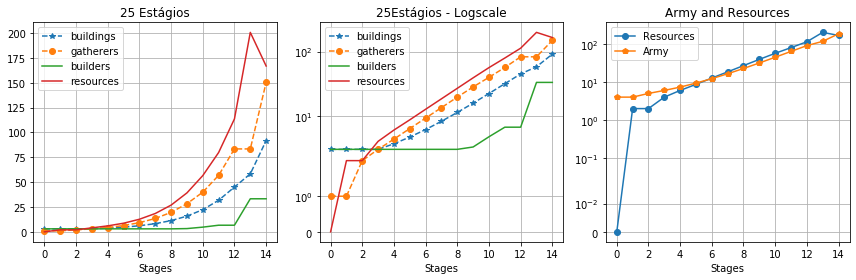

In [39]:
MSS_plot(25,problem)

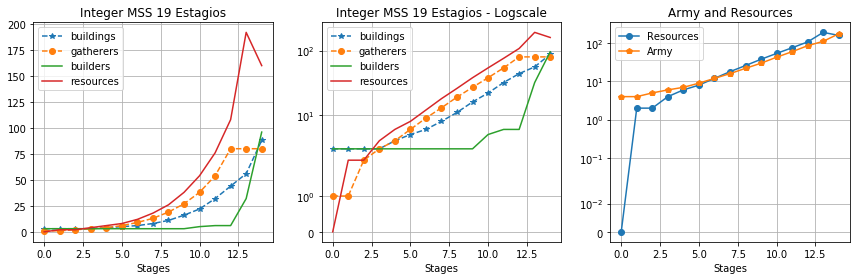

In [40]:
MSS_plot(25, int_problem, Title = 'Integer MSS 19 Estagios')

In [11]:
problem.status

'optimal'

In [12]:
int_problem.status

'optimal'